<a href="https://colab.research.google.com/github/VeronicaHeringer/Curso_PyGeo/blob/main/RESOLUCAO_EXERC_M03_PYGEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Instalações necessárias para esse exercício
!apt update -q
!apt upgrade -q
!apt install gdal-bin python-gdal python3-gdal -q
!apt install python3-rtree -q
!pip install geopandas==0.14.4 -q
!pip install descartes -q

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,163 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,391 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Pac

Exercícios M3 - Trabalhando com geocodificação e concatenação espacial

Agora vamos praticar e expandir o que aprendemos no módulo M3 - Geocodificação, consultas espaciais e concatenação de tabelas.

E1 - Geocodifique áreas verdes

Nesse exercício vamos geocodificar áreas verdes da cidade de São José dos Campos e criar um shapefile chamado areas_verdes.shp.

a) Crie um .txt que nem o que utilizamos na aula (endereco.txt) para as localizações abaixo e salve como areas_verdes.txt. Adicione uma coluna chamada Local com apelidos ou nome curtos para cada área.

Praça Afonso Pena, São José dos Campos
Praça Ouro Preto, São José dos Campos
Praça Caratinga, São José dos Campos
Centro Poliesportivo Vila Tesouro, São José dos Campos
Praça Mario Porto, São José dos Campos
Centro da Juventude, São José dos Campos
Parque Vicentina Aranha, São José dos Campos
b) Geocodifique os endereços

c) Reprojete as geometrias para WGS84 UTM Zona 23S

d) Faça uma concatenação baseada em atributo para obter a coluna local da tabela original

e) Exporte como um shapefile com o nome areas_verdes.shp

In [3]:
# Geocodificandoo s endereços
# fazer a leitura do arquivo txt do pc
from google.colab import files
uploaded=files.upload()

Saving areas_verdes.txt to areas_verdes.txt


In [4]:
import io
import pandas as pd

dados=pd.read_csv(io.StringIO(uploaded['areas_verdes.txt'].decode ('utf-8')), sep=';')
dados.head()

,Local,Endereco
0,Afonso,"Praça Afonso Pena, São José dos Campos"
1,Ouro,"Praça Ouro Preto, São José dos Campos"
2,Caratinga,"Praça Caratinga, São José dos Campos"
3,Tesouro,"Centro Poliesportivo Vila Tesouro, São José do..."
4,Porto,"Praça Mario Porto, São José dos Campos"


In [5]:
# Importar da geopandas para fazer a geocodificação
from geopandas.tools import geocode

In [6]:
# Fazer a geocodificação
geo=geocode(dados['Endereco'], provider='nominatim', user_agent="PygeoVeve", timeout=5)
geo.head()

,geometry,address
0,POINT (-45.88708 -23.18508),"Praça Afonso Pena, Centro, São José dos Campos..."
1,POINT (-45.85203 -23.17626),"Praça Ouro Preto, Jardim Ismênia, Jardim Ismen..."
2,POINT (-45.85017 -23.17749),"Praça Caratinga, Jardim Ismênia, Jardim Ismeni..."
3,POINT (-45.84422 -23.17438),"Centro Poliesportivo Vila Tesouro, Jardim Ismê..."
4,POINT (-45.88697 -23.23014),"Praça Mário Porto, Jardim Satélite, São José d..."


In [7]:
#  Combinar a tabela original com a tabela resultante da geocodificação
comb=geo.merge(dados, left_index=True, right_index=True)
comb.head()

,geometry,address,Local,Endereco
0,POINT (-45.88708 -23.18508),"Praça Afonso Pena, Centro, São José dos Campos...",Afonso,"Praça Afonso Pena, São José dos Campos"
1,POINT (-45.85203 -23.17626),"Praça Ouro Preto, Jardim Ismênia, Jardim Ismen...",Ouro,"Praça Ouro Preto, São José dos Campos"
2,POINT (-45.85017 -23.17749),"Praça Caratinga, Jardim Ismênia, Jardim Ismeni...",Caratinga,"Praça Caratinga, São José dos Campos"
3,POINT (-45.84422 -23.17438),"Centro Poliesportivo Vila Tesouro, Jardim Ismê...",Tesouro,"Centro Poliesportivo Vila Tesouro, São José do..."
4,POINT (-45.88697 -23.23014),"Praça Mário Porto, Jardim Satélite, São José d...",Porto,"Praça Mario Porto, São José dos Campos"


In [8]:
# Selecionar as colunas de interesse
comb=comb[['geometry', 'address', 'Local']]
comb.head()

,geometry,address,Local
0,POINT (-45.88708 -23.18508),"Praça Afonso Pena, Centro, São José dos Campos...",Afonso
1,POINT (-45.85203 -23.17626),"Praça Ouro Preto, Jardim Ismênia, Jardim Ismen...",Ouro
2,POINT (-45.85017 -23.17749),"Praça Caratinga, Jardim Ismênia, Jardim Ismeni...",Caratinga
3,POINT (-45.84422 -23.17438),"Centro Poliesportivo Vila Tesouro, Jardim Ismê...",Tesouro
4,POINT (-45.88697 -23.23014),"Praça Mário Porto, Jardim Satélite, São José d...",Porto


In [9]:
# Reprojete as geometrias para WGS84 UTM Zona 23S
# Verificando o CRS atual
comb.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
# Reprojetar para UTM Zona 23S
comb=comb.to_crs(crs='epsg:32723')

In [11]:
# Verificar a reprojeção
comb.crs

<Projected CRS: EPSG:32723>
Name: WGS 84 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 48°W and 42°W, southern hemisphere between 80°S and equator, onshore and offshore. Brazil.
- bounds: (-48.0, -80.0, -42.0, 0.0)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

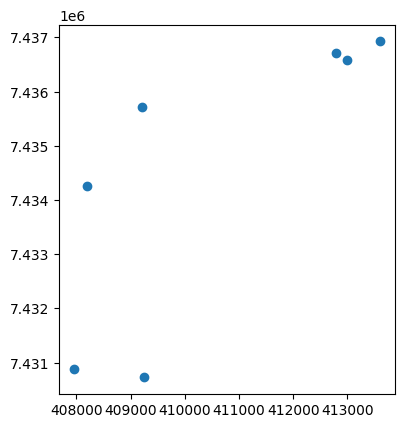

In [12]:
# Plotar os pontos
comb.plot()

In [13]:
# Exportar como shipefile
comb.to_file('areas_verdes.shp')

E2 - Crie buffers ao redor das áreas verdes

Vamos criar buffers de 1 km ao redor de cada uma das áreas verdes que geocodificamos.

a) Crie uma nova coluna no GeoDataFrame para armazenar o buffer

b) Use a função buffer da Geopandas

c) Crie uma cópia do GeoDataFrame original e subtitua as geometrias nele pelos polígonos do buffer

In [14]:
# Criar uma nova coluna no GeoDataFrame para armazenar o buffer
comb.head()

,geometry,address,Local
0,POINT (409212.731 7435714.651),"Praça Afonso Pena, Centro, São José dos Campos...",Afonso
1,POINT (412793.991 7436712.847),"Praça Ouro Preto, Jardim Ismênia, Jardim Ismen...",Ouro
2,POINT (412985.639 7436577.894),"Praça Caratinga, Jardim Ismênia, Jardim Ismeni...",Caratinga
3,POINT (413592.465 7436926.102),"Centro Poliesportivo Vila Tesouro, Jardim Ismê...",Tesouro
4,POINT (409253.896 7430726.052),"Praça Mário Porto, Jardim Satélite, São José d...",Porto


In [15]:
# Criando a nova coluna Buffer
comb['buffer']=None
comb.head()

,geometry,address,Local,buffer
0,POINT (409212.731 7435714.651),"Praça Afonso Pena, Centro, São José dos Campos...",Afonso,None
1,POINT (412793.991 7436712.847),"Praça Ouro Preto, Jardim Ismênia, Jardim Ismen...",Ouro,None
2,POINT (412985.639 7436577.894),"Praça Caratinga, Jardim Ismênia, Jardim Ismeni...",Caratinga,None
3,POINT (413592.465 7436926.102),"Centro Poliesportivo Vila Tesouro, Jardim Ismê...",Tesouro,None
4,POINT (409253.896 7430726.052),"Praça Mário Porto, Jardim Satélite, São José d...",Porto,None


<Axes: >

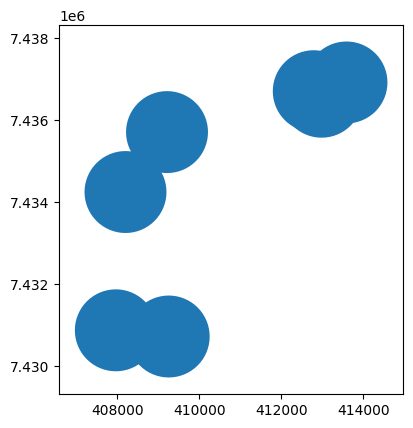

In [16]:
# Criar o buffer de 1km da geopadas
buffer=comb.buffer(1000)
buffer.plot()

In [17]:
# Inserir a geometria do buffer de 1km na coluna criada
comb['buffer']=buffer
comb.head()

,geometry,address,Local,buffer
0,POINT (409212.731 7435714.651),"Praça Afonso Pena, Centro, São José dos Campos...",Afonso,"POLYGON ((410212.731 7435714.651, 410207.916 7..."
1,POINT (412793.991 7436712.847),"Praça Ouro Preto, Jardim Ismênia, Jardim Ismen...",Ouro,"POLYGON ((413793.991 7436712.847, 413789.176 7..."
2,POINT (412985.639 7436577.894),"Praça Caratinga, Jardim Ismênia, Jardim Ismeni...",Caratinga,"POLYGON ((413985.639 7436577.894, 413980.824 7..."
3,POINT (413592.465 7436926.102),"Centro Poliesportivo Vila Tesouro, Jardim Ismê...",Tesouro,"POLYGON ((414592.465 7436926.102, 414587.649 7..."
4,POINT (409253.896 7430726.052),"Praça Mário Porto, Jardim Satélite, São José d...",Porto,"POLYGON ((410253.896 7430726.052, 410249.081 7..."


In [18]:
# Criar uma cópia do geodataframe comb
copia_comb=comb[['geometry', 'address', 'Local']]
copia_comb.head()

,geometry,address,Local
0,POINT (409212.731 7435714.651),"Praça Afonso Pena, Centro, São José dos Campos...",Afonso
1,POINT (412793.991 7436712.847),"Praça Ouro Preto, Jardim Ismênia, Jardim Ismen...",Ouro
2,POINT (412985.639 7436577.894),"Praça Caratinga, Jardim Ismênia, Jardim Ismeni...",Caratinga
3,POINT (413592.465 7436926.102),"Centro Poliesportivo Vila Tesouro, Jardim Ismê...",Tesouro
4,POINT (409253.896 7430726.052),"Praça Mário Porto, Jardim Satélite, São José d...",Porto


In [19]:
# Substituir a geometria de ponto pelo polígono do buffer
copia_comb['geometry']=buffer

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [20]:
copia_comb

,geometry,address,Local
0,"POLYGON ((410212.731 7435714.651, 410207.916 7...","Praça Afonso Pena, Centro, São José dos Campos...",Afonso
1,"POLYGON ((413793.991 7436712.847, 413789.176 7...","Praça Ouro Preto, Jardim Ismênia, Jardim Ismen...",Ouro
2,"POLYGON ((413985.639 7436577.894, 413980.824 7...","Praça Caratinga, Jardim Ismênia, Jardim Ismeni...",Caratinga
3,"POLYGON ((414592.465 7436926.102, 414587.649 7...","Centro Poliesportivo Vila Tesouro, Jardim Ismê...",Tesouro
4,"POLYGON ((410253.896 7430726.052, 410249.081 7...","Praça Mário Porto, Jardim Satélite, São José d...",Porto
5,"POLYGON ((408963.452 7430877.183, 408958.636 7...","Centro da Juventude, Jardim América, São José ...",Juventude
6,"POLYGON ((409199.569 7434251.988, 409194.753 7...","Parque Vicentina Aranha, 302, Vila Adyana, São...",Aranha


In [21]:
comb

,geometry,address,Local,buffer
0,POINT (409212.731 7435714.651),"Praça Afonso Pena, Centro, São José dos Campos...",Afonso,"POLYGON ((410212.731 7435714.651, 410207.916 7..."
1,POINT (412793.991 7436712.847),"Praça Ouro Preto, Jardim Ismênia, Jardim Ismen...",Ouro,"POLYGON ((413793.991 7436712.847, 413789.176 7..."
2,POINT (412985.639 7436577.894),"Praça Caratinga, Jardim Ismênia, Jardim Ismeni...",Caratinga,"POLYGON ((413985.639 7436577.894, 413980.824 7..."
3,POINT (413592.465 7436926.102),"Centro Poliesportivo Vila Tesouro, Jardim Ismê...",Tesouro,"POLYGON ((414592.465 7436926.102, 414587.649 7..."
4,POINT (409253.896 7430726.052),"Praça Mário Porto, Jardim Satélite, São José d...",Porto,"POLYGON ((410253.896 7430726.052, 410249.081 7..."
5,POINT (407963.452 7430877.183),"Centro da Juventude, Jardim América, São José ...",Juventude,"POLYGON ((408963.452 7430877.183, 408958.636 7..."
6,POINT (408199.569 7434251.988),"Parque Vicentina Aranha, 302, Vila Adyana, São...",Aranha,"POLYGON ((409199.569 7434251.988, 409194.753 7..."


E3 - Quantas pessoas vivem em um raido de 1km dessa áreas verdes

Para responder essa pergunta utilizaremos uma concatenação baseada em relacionamento espacial (spatial join).

a) Importe o arquivo pop_sjc.shp

b) Execute a concatenação espacial entre o buffer e os setores censitários

c) Agrupe o geodataframe pelo nome de cada área verde

d) Calcule a soma da população vivendo à 1km para cada área verde.

e) Insira a população total no GeoDataFrame do buffer

RESOLUÇÃO DO EXERCÍCIO

In [22]:
# Conectar ao google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [23]:
# Importar a biblio geopandas
import geopandas as gpd

In [24]:
# Leitura do arquivo pop-sjc.shp
pop=gpd.read_file ('/content/drive/MyDrive/Colab Notebooks/MATERIAL_CURSO_DRIVE/M3/M3/pop_sjc.shp')
pop.head()

,pop,Cod_setor,geometry
0,359.0,354990405000001,"POLYGON ((-45.88576 -23.18283, -45.88454 -23.1..."
1,319.0,354990405000002,"POLYGON ((-45.88576 -23.18283, -45.88612 -23.1..."
2,542.0,354990405000003,"POLYGON ((-45.88488 -23.18101, -45.88371 -23.1..."
3,42.0,354990405000004,"POLYGON ((-45.88095 -23.18144, -45.88043 -23.1..."
4,435.0,354990405000005,"POLYGON ((-45.88329 -23.18240, -45.88237 -23.1..."


In [25]:
# Verificar se os dados estão no msm Sistema de coordenadas
pop.crs==copia_comb.crs

False

In [26]:
#Verificar quais são os sistemas
print(pop.crs)
print(copia_comb.crs)

EPSG:4674
epsg:32723


In [27]:
copia_comb.crs

<Projected CRS: EPSG:32723>
Name: WGS 84 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 48°W and 42°W, southern hemisphere between 80°S and equator, onshore and offshore. Brazil.
- bounds: (-48.0, -80.0, -42.0, 0.0)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
# Deixar no mesmo sist de coord. Converter pro epsg 32723
pop=pop.to_crs(crs='epsg:32723')
pop.crs==copia_comb.crs


True

In [29]:
# Fazer a junção espacial
pop_join=gpd.sjoin(pop, copia_comb, how='inner', predicate='within')
pop_join.head()

,pop,Cod_setor,geometry,index_right,address,Local
0,359.0,354990405000001,"POLYGON ((409346.172 7435964.463, 409471.216 7...",0,"Praça Afonso Pena, Centro, São José dos Campos...",Afonso
3,42.0,354990405000004,"POLYGON ((409837.547 7436121.894, 409891.118 7...",0,"Praça Afonso Pena, Centro, São José dos Campos...",Afonso
5,389.0,354990405000006,"POLYGON ((409633.011 7435873.537, 409879.007 7...",0,"Praça Afonso Pena, Centro, São José dos Campos...",Afonso
7,92.0,354990405000008,"POLYGON ((409121.524 7435776.317, 409156.497 7...",0,"Praça Afonso Pena, Centro, São José dos Campos...",Afonso
8,510.0,354990405000009,"POLYGON ((409070.702 7436254.741, 409076.116 7...",0,"Praça Afonso Pena, Centro, São José dos Campos...",Afonso


In [30]:
# Verificar o tamanho da tabela
pop_join.shape

(168, 6)

In [31]:
# Agrupar o geodataframe pelo nome cada áreas verdes
pop=pop_join.groupby('Local')[['pop']].sum()
pop.head()

,pop
Local,
Afonso,6912.0
Aranha,13230.0
Caratinga,14812.0
Juventude,12453.0
Ouro,11080.0


In [43]:
# Inserir a pop total no geodataframe do buffer
pop_buffer=copia_comb.merge(pop, on='Local', how='left')
pop_buffer.head()

,geometry,address,Local,pop
0,"POLYGON ((410212.731 7435714.651, 410207.916 7...","Praça Afonso Pena, Centro, São José dos Campos...",Afonso,6912.0
1,"POLYGON ((413793.991 7436712.847, 413789.176 7...","Praça Ouro Preto, Jardim Ismênia, Jardim Ismen...",Ouro,11080.0
2,"POLYGON ((413985.639 7436577.894, 413980.824 7...","Praça Caratinga, Jardim Ismênia, Jardim Ismeni...",Caratinga,14812.0
3,"POLYGON ((414592.465 7436926.102, 414587.649 7...","Centro Poliesportivo Vila Tesouro, Jardim Ismê...",Tesouro,15202.0
4,"POLYGON ((410253.896 7430726.052, 410249.081 7...","Praça Mário Porto, Jardim Satélite, São José d...",Porto,16801.0


In [36]:
# Vizualizar o resultado
!pip install contextily  -q
!pip install mapclassify==2.4.0 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 46.4 MB/s eta 0:00:00


In [38]:
import contextily as cx
import matplotlib.pyplot as plt

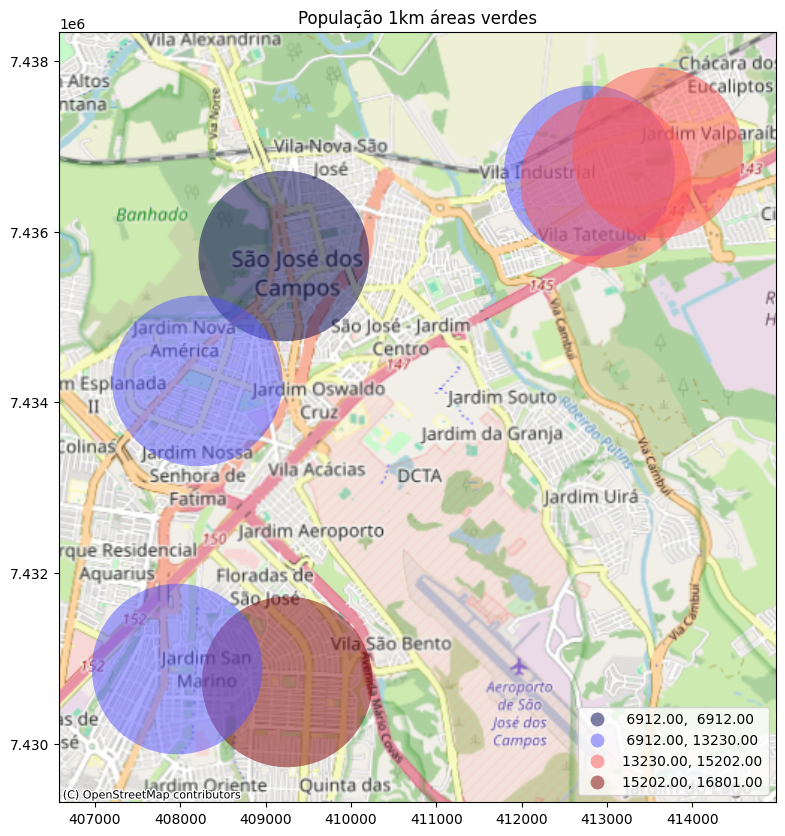

In [47]:
fig,ax=plt.subplots(figsize=(10,10))
pop_buffer.plot(ax=ax, cmap='seismic', column='pop', scheme='natural_breaks', k=4, legend=True, alpha=0.5,
                legend_kwds={'loc':'lower right'})
plt.title('População 1km áreas verdes')
cx.add_basemap(ax=ax, crs=pop_buffer.crs, zoom=13, source=cx.providers.OpenStreetMap.Mapnik)